## Read Data

In [16]:
# Some headers
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt
from pandas import DataFrame
from sklearn.manifold import MDS
from sklearn.model_selection import StratifiedKFold
from scipy.spatial.distance import pdist, cdist

In [17]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

In [18]:
raw_data = pd.read_csv("skyserver_data.csv")

In [19]:
display(raw_data.head(5))

,u,g,r,i,z,feh,teff,logg,type,mode,flags,fehcount,teffcount,loggcount
0,20.32575,20.06967,19.79780,19.57714,19.19120,-9999.000000,-9999.000,-9999.000000,3,1,EnnnX,0,0,0
1,19.10064,16.81490,15.60841,15.11939,14.75466,-9999.000000,-9999.000,-9999.000000,3,1,VnnnX,0,0,0
2,19.68658,18.14682,17.44558,17.15404,16.98137,-0.603138,5453.230,4.267729,6,1,nnnnn,5,6,6
3,20.10641,18.51974,17.78331,17.49296,17.32693,-0.944107,5144.626,4.516516,6,1,nnnnn,6,6,6
4,19.68594,17.66147,16.76749,16.38243,16.13824,-1.295699,4750.917,1.712230,6,1,nnngn,4,3,4


In [20]:
print(raw_data.shape)

(500000, 14)


In [21]:
raw_data.columns.values

array(['u', 'g', 'r', 'i', 'z', 'feh', 'teff', 'logg', 'type', 'mode',
       'flags', 'fehcount', 'teffcount', 'loggcount'], dtype=object)

In [22]:
data = raw_data[raw_data["teff"] != -9999]

In [23]:
print(data.shape)

(112777, 14)


u
g
r
i
z
feh
teff
logg
type
mode


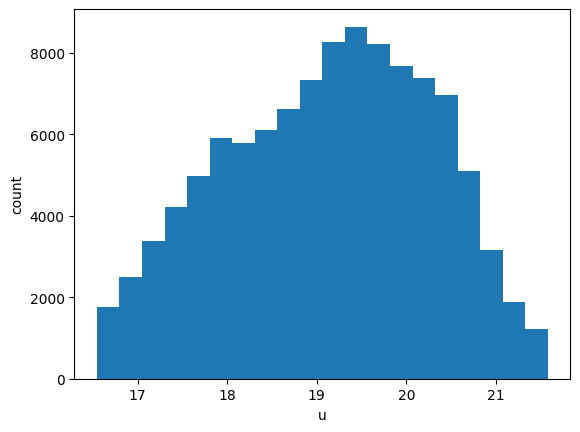

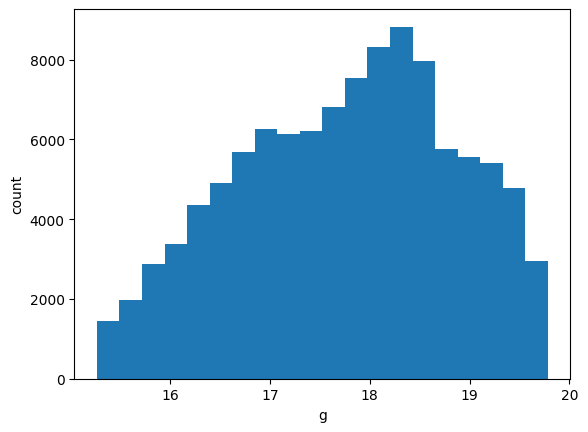

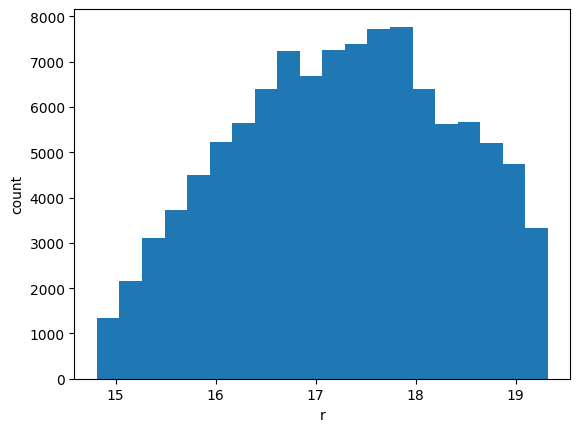

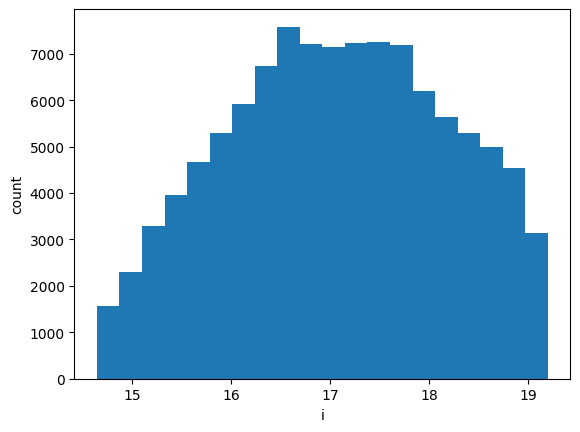

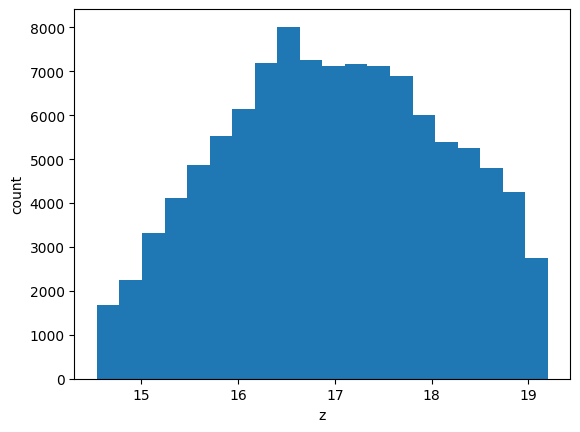

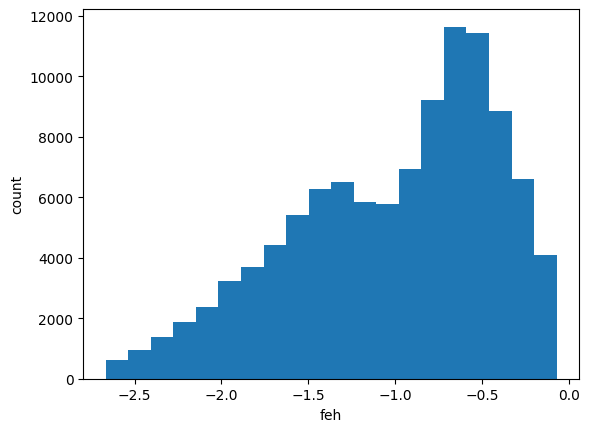

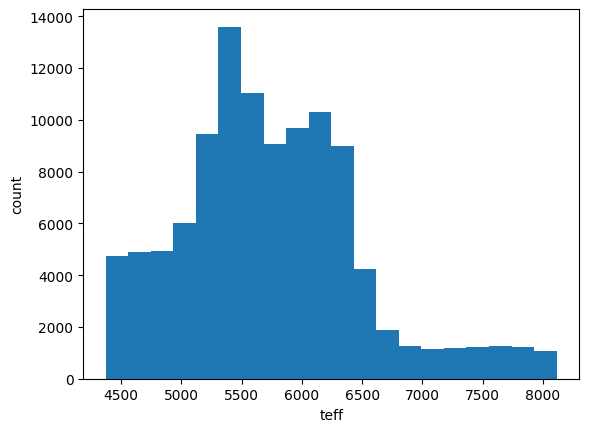

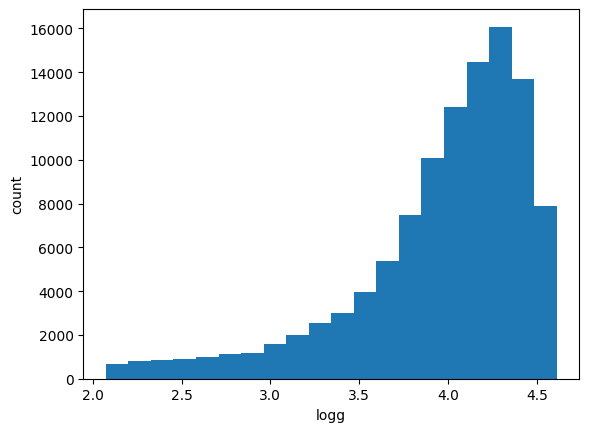

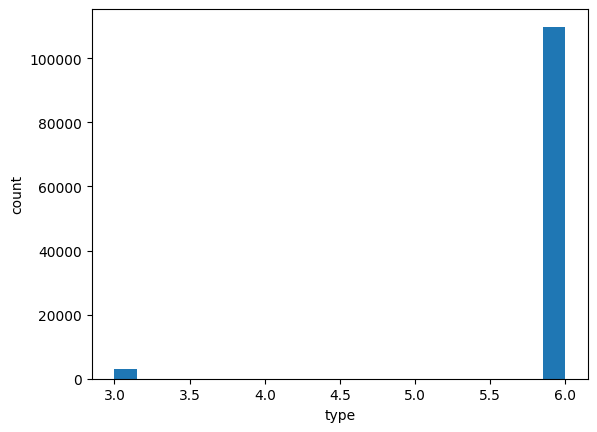

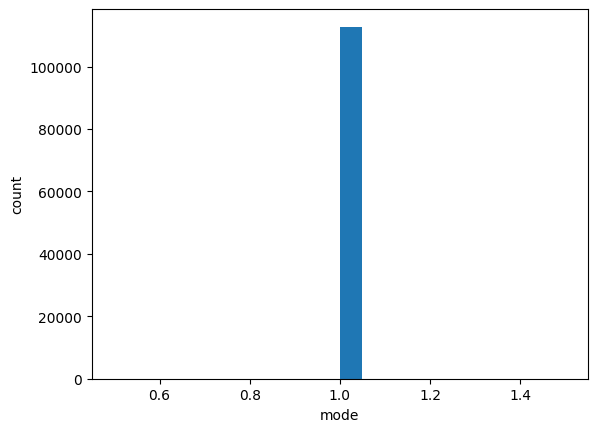

In [24]:
def explore_distribution(col_name, series, num_bins=20, interval=.95):

    tail = (1-interval)/2
    low_q = series.quantile(tail)
    high_q = series.quantile(1-tail)
    
    s = series[(series >= low_q) & (series <= high_q)]
    
    print(col_name)
    plt.figure()
    plt.hist(s, num_bins, label=col_name)
    plt.xlabel(col_name)
    plt.ylabel("count")
    
FEATURE_COLS = ["u", "g", "r", "i", "z", "feh", "teff", "logg", "type", "mode"]
    
for col in SHOW_COLS:
    explore_distribution(col, data[col])

In [30]:
print("Data size before filtering:", data.shape)
data = data[(data["mode"] == 1.0) & (data["type"] == 6.0)]
print("Data size after filtering:", data.shape)

Data size before filtering: (112777, 14)
Data size after filtering: (109839, 14)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[["u", "g", "r", "i", "z", "feh", "teff", "logg"]])

scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df = scaled_data_df.set_axis(["u", "g", "r", "i", "z", "feh", "teff", "logg"], axis=1)

In [31]:
scaled_data.shape

(112777, 8)

In [45]:
for column in scaled_data_df.columns.values:
    print()
    print(f"DESCRIBING COLUMN {column}")
    print("-"*20)
    print(scaled_data_df[column].describe())
    print()


DESCRIBING COLUMN u
--------------------
count    1.127770e+05
mean    -3.528237e-18
std      1.000004e+00
min     -5.120154e+01
25%      1.461481e-02
50%      1.996186e-02
75%      2.437628e-02
max      7.119584e-02
Name: u, dtype: float64


DESCRIBING COLUMN g
--------------------
count    1.127770e+05
mean     2.520169e-18
std      1.000004e+00
min     -5.243607e+01
25%      1.447056e-02
50%      1.961335e-02
75%      2.361145e-02
max      8.328466e-02
Name: g, dtype: float64


DESCRIBING COLUMN r
--------------------
count    1.127770e+05
mean     1.890127e-18
std      1.000004e+00
min     -5.844915e+01
25%      1.199550e-02
50%      1.737454e-02
75%      2.241047e-02
max      8.194735e-02
Name: r, dtype: float64


DESCRIBING COLUMN i
--------------------
count    1.127770e+05
mean    -6.804456e-18
std      1.000004e+00
min     -5.596016e+01
25%      1.291195e-02
50%      1.796056e-02
75%      2.304622e-02
max      8.077985e-02
Name: i, dtype: float64


DESCRIBING COLUMN z
-------